In [3]:
pwd

'C:\\Users\\Kriszta\\Desktop\\GitHub-Spiced\\logistic-lemongrass-student-code\\week_8\\data'

In [250]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
from networkx.drawing.nx_pydot import write_dot

plt.rcParams['figure.figsize'] = (10,6)

In [157]:
monday = pd.read_csv('monday.csv' , sep= ';')
tuesday = pd.read_csv('tuesday.csv' , sep= ';')
wednesday = pd.read_csv('wednesday.csv' , sep= ';')
thursday = pd.read_csv('thursday.csv' , sep= ';')
friday = pd.read_csv('friday.csv' , sep= ';')

In [158]:
week = pd.concat([monday, tuesday, wednesday, thursday, friday])

In [159]:
week['date']= pd.to_datetime(week['timestamp'])
week['week_days'] = week['date'].dt.dayofweek
week['day'] = pd.to_datetime(week['date']).dt.day
week['hour']= pd.to_datetime(week['date']).dt.hour
week['minute']= pd.to_datetime(week['date']).dt.minute
week.set_index('date', inplace=True)

In [160]:
week.head()

,timestamp,customer_no,location,week_days,day,hour,minute
date,,,,,,,
2019-09-02 07:03:00,2019-09-02 07:03:00,1,dairy,0,2,7,3
2019-09-02 07:03:00,2019-09-02 07:03:00,2,dairy,0,2,7,3
2019-09-02 07:04:00,2019-09-02 07:04:00,3,dairy,0,2,7,4
2019-09-02 07:04:00,2019-09-02 07:04:00,4,dairy,0,2,7,4
2019-09-02 07:04:00,2019-09-02 07:04:00,5,spices,0,2,7,4


In [161]:
# Calculate the total number of customers in each section over the week

week.groupby(['location','week_days']).nunique()

timestamp  customer_no  location  week_days  day  hour  \
location week_days                                                           
checkout 0                700         1437         1          1    1    15   
         1                682         1420         1          1    1    15   
         2                699         1526         1          1    1    15   
         3                693         1532         1          1    1    15   
         4                686         1502         1          1    1    15   
dairy    0                527          720         1          1    1    15   
         1                527          751         1          1    1    15   
         2                543          804         1          1    1    15   
         3                540          782         1          1    1    15   
         4                544          761         1          1    1    15   
drinks   0                514          661         1          1    1    15   
         1                456          581         1          1    1    15   
         2                483          652         1          1    1    15   
         3                502          632         1          1    1    15   
         4                524          688         1          1    1    15   
fruit    0                577          827         1          1    1    15   
         1                521          827         1          1    1    15   
         2                562          884         1          1    1    15   
         3                587          872         1          1    1    15   
         4                577          874         1          1    1    15   
spices   0                479          584         1          1    1    15   
         1                450          543         1          1    1    15   
         2                475          565         1          1    1    15   
         3                497          613         1          1    1    15   
         4                494          633         1          1    1    15   

                    minute  
location week_days          
checkout 0              60  
         1              60  
         2              60  
         3              60  
         4              60  
dairy    0              60  
         1              60  
         2              60  
         3              60  
         4              60  
drinks   0              60  
         1              60  
         2              60  
         3              60  
         4              60  
fruit    0              60  
         1              60  
         2              60  
         3              60  
         4              60  
spices   0              60  
         1              60  
         2              60  
         3              60  
         4              60

In [162]:
location_count = pd.DataFrame(week.groupby(['location','week_days']).nunique())
location_count.drop(['timestamp','location','hour','minute','day','week_days'], axis=1, inplace=True)
location_count.reset_index(inplace=True) 
location_count.head()

,location,week_days,customer_no
0,checkout,0,1437
1,checkout,1,1420
2,checkout,2,1526
3,checkout,3,1532
4,checkout,4,1502


Text(0.5, 0, 'location')

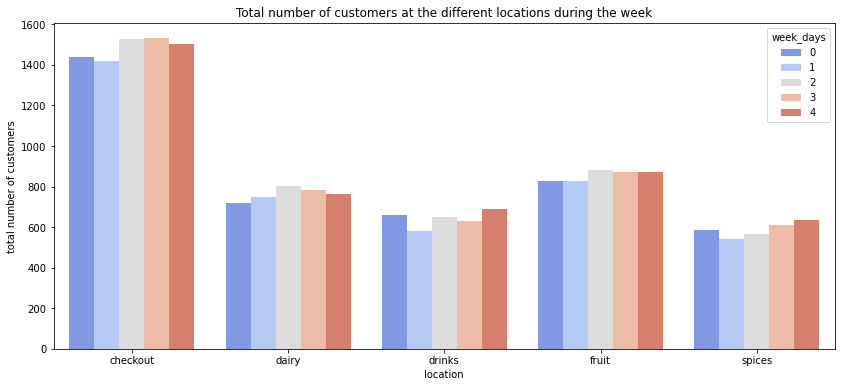

In [210]:
plt.figure(figsize=(14,6))

sns.barplot(data=location_count , x = 'location' , y='customer_no', hue = 'week_days', palette ='coolwarm')

plt.title('Total number of customers at the different locations during the week')
plt.ylabel('total number of customers')
plt.xlabel('location')

In [164]:
# Calculate the total number of customers in each section over hour for each days

customers = pd.DataFrame(week.groupby(['location','week_days','hour'])['customer_no'].count())
customers.reset_index(inplace=True)
customers.head()

,location,week_days,hour,customer_no
0,checkout,0,7,92
1,checkout,0,8,112
2,checkout,0,9,85
3,checkout,0,10,90
4,checkout,0,11,55


Text(0.5, 0, 'location')

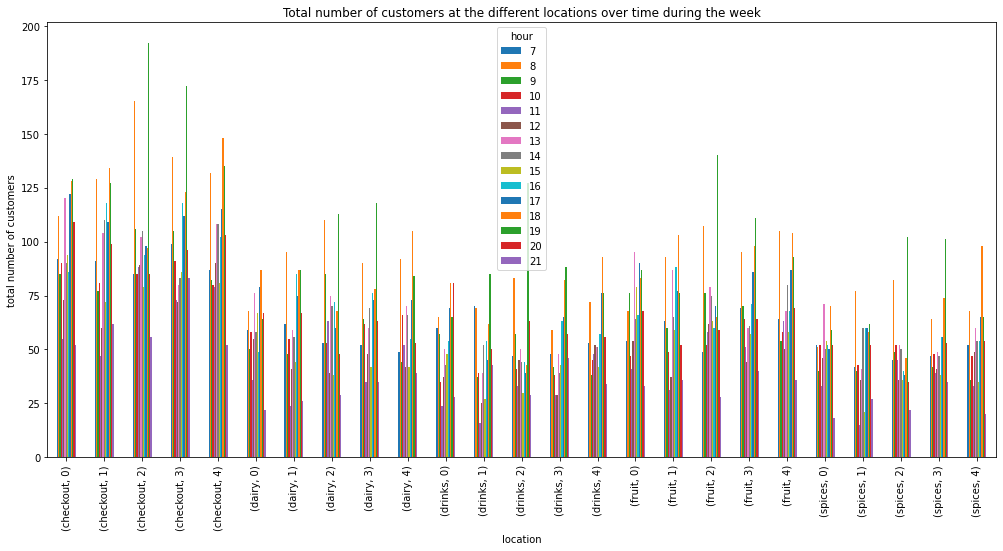

In [165]:
plt.rcParams['figure.figsize'] = (17,8)

week.groupby(['location','week_days','hour'])['customer_no'].count().unstack().plot.bar()
plt.title('Total number of customers at the different locations over time during the week')
plt.ylabel('total number of customers')
plt.xlabel('location')

In [166]:
# Display the number of customers at checkout over time

week[week['location'] == 'checkout'].groupby(['timestamp'])['customer_no'].count()

timestamp
2019-09-02 07:05:00    2
2019-09-02 07:06:00    2
2019-09-02 07:07:00    1
2019-09-02 07:08:00    3
2019-09-02 07:09:00    1
                      ..
2019-09-06 21:37:00    1
2019-09-06 21:45:00    1
2019-09-06 21:47:00    2
2019-09-06 21:48:00    2
2019-09-06 21:50:00    2
Name: customer_no, Length: 3460, dtype: int64

In [167]:
# let´s see by hour, each day

In [168]:
checkout = pd.DataFrame(week[week['location'] == 'checkout'].groupby(['week_days','hour'])['customer_no'].count())
checkout.reset_index(inplace=True)
checkout.head()

,week_days,hour,customer_no
0,0,7,92
1,0,8,112
2,0,9,85
3,0,10,90
4,0,11,55


Text(0.5, 0, 'hour')

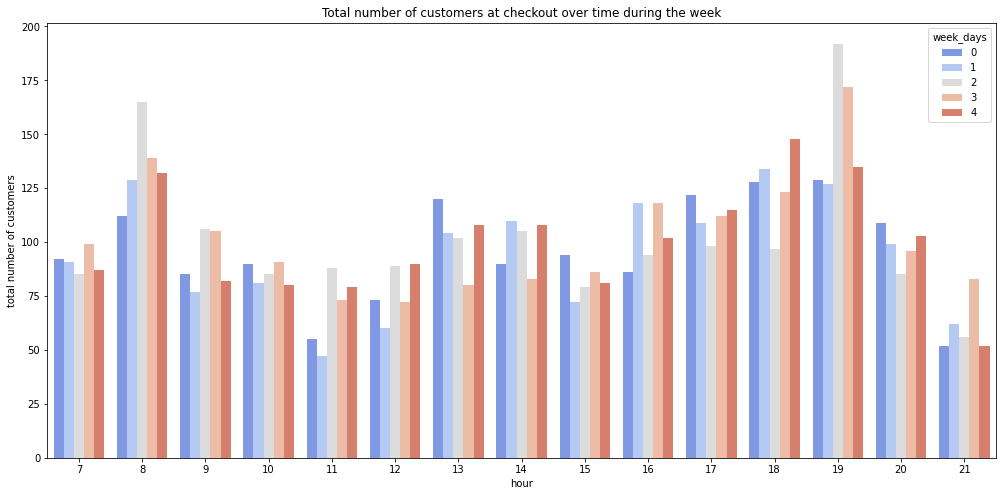

In [169]:
plt.rcParams['figure.figsize'] = (17,8)

sns.barplot(data=checkout , x = 'hour' , y='customer_no', hue = 'week_days', palette ='coolwarm')

plt.title('Total number of customers at checkout over time during the week')
plt.ylabel('total number of customers')
plt.xlabel('hour')

In [170]:
# Calculate the time each customer spent in the market

In [171]:
arrival_time=week.groupby(['customer_no','week_days'], as_index = False) ['timestamp'].min()
arrival_time.rename(columns={'timestamp':'arrival_time'}, inplace=True)
arrival_time.head()

,customer_no,week_days,arrival_time
0,1,0,2019-09-02 07:03:00
1,1,1,2019-09-03 07:02:00
2,1,2,2019-09-04 07:00:00
3,1,3,2019-09-05 07:00:00
4,1,4,2019-09-06 07:00:00


In [172]:
check_out_time=week.groupby(['customer_no','week_days'],as_index = False) ['timestamp'].max()
check_out_time.rename(columns={'timestamp':'check_out_time', 'week_days': 'week_days1', 'customer_no':'customer_no1'}, inplace=True)
check_out_time.head()

,customer_no1,week_days1,check_out_time
0,1,0,2019-09-02 07:05:00
1,1,1,2019-09-03 07:12:00
2,1,2,2019-09-04 07:02:00
3,1,3,2019-09-05 07:02:00
4,1,4,2019-09-06 07:05:00


In [173]:
time = pd.concat([check_out_time, arrival_time] ,axis = 1, sort= False)
time.head()

,customer_no1,week_days1,check_out_time,customer_no,week_days,arrival_time
0,1,0,2019-09-02 07:05:00,1,0,2019-09-02 07:03:00
1,1,1,2019-09-03 07:12:00,1,1,2019-09-03 07:02:00
2,1,2,2019-09-04 07:02:00,1,2,2019-09-04 07:00:00
3,1,3,2019-09-05 07:02:00,1,3,2019-09-05 07:00:00
4,1,4,2019-09-06 07:05:00,1,4,2019-09-06 07:00:00


In [174]:
time['arrival_time'] = pd.to_datetime(time['arrival_time'], format = '%Y-%m-%d %H:%M:%S.%f')
time['check_out_time']=pd.to_datetime(time['check_out_time'] , format = '%Y-%m-%d %H:%M:%S.%f')

In [175]:
time['stay']= time['check_out_time']-time['arrival_time']

In [176]:
time.head()

,customer_no1,week_days1,check_out_time,customer_no,week_days,arrival_time,stay
0,1,0,2019-09-02 07:05:00,1,0,2019-09-02 07:03:00,00:02:00
1,1,1,2019-09-03 07:12:00,1,1,2019-09-03 07:02:00,00:10:00
2,1,2,2019-09-04 07:02:00,1,2,2019-09-04 07:00:00,00:02:00
3,1,3,2019-09-05 07:02:00,1,3,2019-09-05 07:00:00,00:02:00
4,1,4,2019-09-06 07:05:00,1,4,2019-09-06 07:00:00,00:05:00


In [177]:
time['stay_min']= time['stay'].dt.total_seconds()/60
time['stay_min'] = time['stay_min'].astype(int)

In [178]:
time.head()

,customer_no1,week_days1,check_out_time,customer_no,week_days,arrival_time,stay,stay_min
0,1,0,2019-09-02 07:05:00,1,0,2019-09-02 07:03:00,00:02:00,2
1,1,1,2019-09-03 07:12:00,1,1,2019-09-03 07:02:00,00:10:00,10
2,1,2,2019-09-04 07:02:00,1,2,2019-09-04 07:00:00,00:02:00,2
3,1,3,2019-09-05 07:02:00,1,3,2019-09-05 07:00:00,00:02:00,2
4,1,4,2019-09-06 07:05:00,1,4,2019-09-06 07:00:00,00:05:00,5


In [179]:
monday = pd.DataFrame(time[time['week_days'] == 0]['stay_min'].value_counts())
tuesday = pd.DataFrame(time[time['week_days'] == 1]['stay_min'].value_counts())
wednesday = pd.DataFrame(time[time['week_days'] == 2]['stay_min'].value_counts())
thursday = pd.DataFrame(time[time['week_days'] == 3]['stay_min'].value_counts())
friday = pd.DataFrame(time[time['week_days'] == 4]['stay_min'].value_counts())

Text(0.5, 0, 'how long stayed (in minutes)')

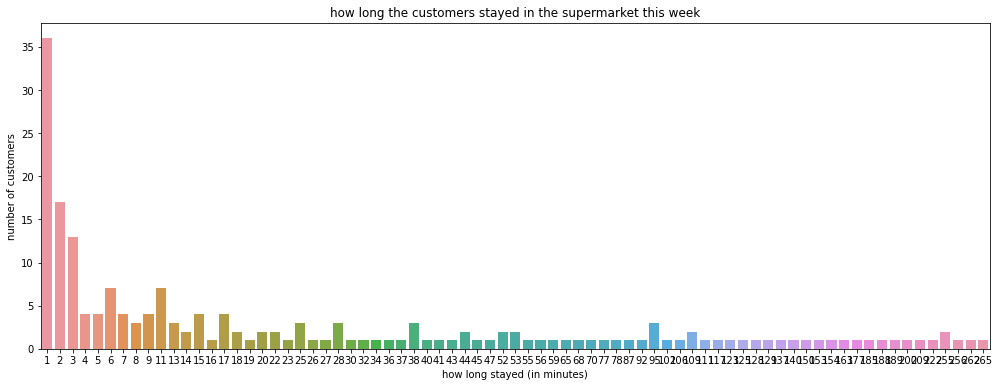

In [180]:
plt.rcParams['figure.figsize'] = (17,6)

week_count= pd.concat([monday, tuesday, wednesday, thursday, friday])
sns.countplot(x ='stay_min' , data= week_count)
plt.title('how long the customers stayed in the supermarket this week')
plt.ylabel('number of customers')
plt.xlabel('how long stayed (in minutes)')

In [181]:
# Calculate the total number of customers present in the supermarket this week

In [182]:
location_count['customer_no'].sum()  # 

21671

In [183]:
df = pd.DataFrame(location_count.groupby(['week_days'])['customer_no'].sum()) # number of customers by days
df.reset_index(inplace=True)
df

,week_days,customer_no
0,0,4229
1,1,4122
2,2,4431
3,3,4431
4,4,4458


Text(0.5, 0, 'days of the week)')

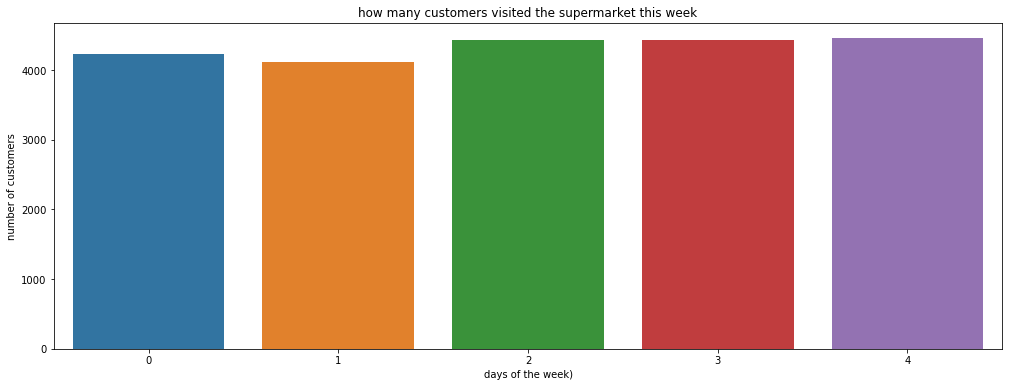

In [184]:
week_count= pd.concat([monday, tuesday, wednesday, thursday, friday])
sns.barplot(x ='week_days' , y = 'customer_no', data= df)
plt.title('how many customers visited the supermarket this week')
plt.ylabel('number of customers')
plt.xlabel('days of the week)')

In [185]:
week.head()

,timestamp,customer_no,location,week_days,day,hour,minute
date,,,,,,,
2019-09-02 07:03:00,2019-09-02 07:03:00,1,dairy,0,2,7,3
2019-09-02 07:03:00,2019-09-02 07:03:00,2,dairy,0,2,7,3
2019-09-02 07:04:00,2019-09-02 07:04:00,3,dairy,0,2,7,4
2019-09-02 07:04:00,2019-09-02 07:04:00,4,dairy,0,2,7,4
2019-09-02 07:04:00,2019-09-02 07:04:00,5,spices,0,2,7,4


In [186]:
week.drop(['timestamp','hour','minute'], axis= 1, inplace =True)
week = week.groupby(['customer_no']).resample('T').ffill()
week.drop(['customer_no'], axis= 1, inplace =True)
week=week.reset_index().set_index('date')
week.head()

,customer_no,location,week_days,day
date,,,,
2019-09-02 07:03:00,1,dairy,0,2
2019-09-02 07:04:00,1,dairy,0,2
2019-09-02 07:05:00,1,checkout,0,2
2019-09-02 07:06:00,1,checkout,0,2
2019-09-02 07:07:00,1,checkout,0,2


In [187]:
week['prev_location']= week['location'].shift(1)
week.head()

,customer_no,location,week_days,day,prev_location
date,,,,,
2019-09-02 07:03:00,1,dairy,0,2,NaN
2019-09-02 07:04:00,1,dairy,0,2,dairy
2019-09-02 07:05:00,1,checkout,0,2,dairy
2019-09-02 07:06:00,1,checkout,0,2,checkout
2019-09-02 07:07:00,1,checkout,0,2,checkout


In [188]:
week=week[week['prev_location'] != 'checkout']
week.fillna('entrance' , inplace= True)
week.head()

,customer_no,location,week_days,day,prev_location
date,,,,,
2019-09-02 07:03:00,1,dairy,0,2,entrance
2019-09-02 07:04:00,1,dairy,0,2,dairy
2019-09-02 07:05:00,1,checkout,0,2,dairy
2019-09-03 07:03:00,1,fruit,1,3,fruit
2019-09-03 07:04:00,1,fruit,1,3,fruit


In [189]:
locations = pd.DataFrame(week['location'].value_counts())
locations.reset_index(inplace=True)
locations.rename(columns={'index':'section'},inplace= True)
locations

,section,location
0,dairy,32400
1,fruit,23972
2,spices,11977
3,drinks,8593
4,checkout,7417


In [190]:
section = ['fruit','spices','dairy','drinks']
revenue_per_minute_euro = [4,3,5,6]

rev = pd.DataFrame({'section':section, 'revenue_per_minute_euro':revenue_per_minute_euro})
rev

,section,revenue_per_minute_euro
0,fruit,4
1,spices,3
2,dairy,5
3,drinks,6


In [191]:
df = pd.merge(left=rev , right=locations , left_on='section', right_on = 'section', how='left')
df['location'].fillna('0', inplace=True)
df['revenue_per_minute_euro'] = df['revenue_per_minute_euro'].astype(int)
df['location'] = df['location'].astype(int)
df['spent_euro'] = df['revenue_per_minute_euro']*df['location']
df

,section,revenue_per_minute_euro,location,spent_euro
0,fruit,4,23972,95888
1,spices,3,11977,35931
2,dairy,5,32400,162000
3,drinks,6,8593,51558


Text(0.5, 0, 'section')

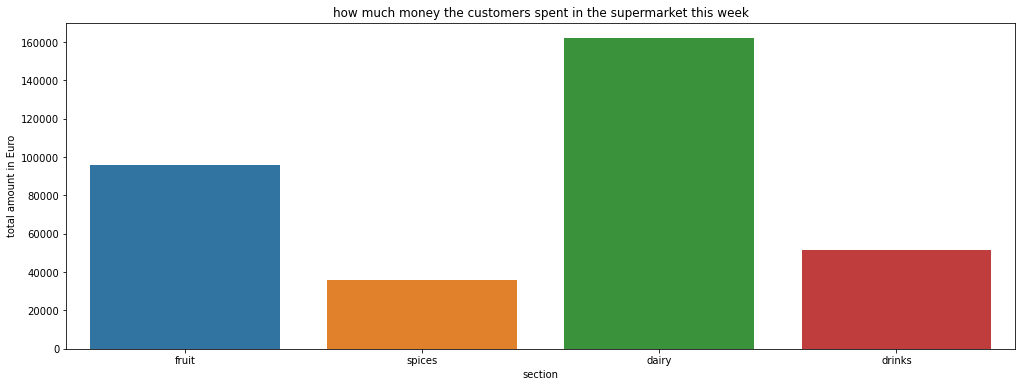

In [192]:
sns.barplot(x='section', y='spent_euro', data=df)
plt.title('how much money the customers spent in the supermarket this week')
plt.ylabel('total amount in Euro')
plt.xlabel('section')

In [193]:
df['spent_euro'].sum()  # the total income this week 

345377

In [199]:
# let´s get the transition probability matrix for the full week

week.groupby(['prev_location', 'location']).count()['customer_no'].unstack()

location,checkout,dairy,drinks,fruit,spices
prev_location,,,,,
dairy,1825.0,29857.0,1046.0,889.0,918.0
drinks,2096.0,106.0,5823.0,855.0,846.0
entrance,NaN,1.0,NaN,NaN,NaN
fruit,2555.0,1221.0,697.0,21657.0,646.0
spices,941.0,1215.0,1027.0,571.0,9567.0


In [196]:
pd.crosstab(week['prev_location'], week['location'], normalize= 0)

location,checkout,dairy,drinks,fruit,spices
prev_location,,,,,
dairy,0.052845,0.864543,0.030288,0.025742,0.026582
drinks,0.215505,0.010899,0.598705,0.087909,0.086983
entrance,0.000000,1.000000,0.000000,0.000000,0.000000
fruit,0.095421,0.045601,0.026031,0.808821,0.024126
spices,0.070640,0.091209,0.077096,0.042865,0.718189


In [197]:
#change the order of the columns as the supermarket model

sup_mark = pd.crosstab(week['prev_location'], week['location'], normalize= 0)
sup_mark = sup_mark[['fruit','spices','dairy','drinks','checkout']]
sup_mark.reindex(index =['entrance','fruit','spices','dairy','drinks'])

location,fruit,spices,dairy,drinks,checkout
prev_location,,,,,
entrance,0.000000,0.000000,1.000000,0.000000,0.000000
fruit,0.808821,0.024126,0.045601,0.026031,0.095421
spices,0.042865,0.718189,0.091209,0.077096,0.070640
dairy,0.025742,0.026582,0.864543,0.030288,0.052845
drinks,0.087909,0.086983,0.010899,0.598705,0.215505


In [ ]:
# customers movments with networkx

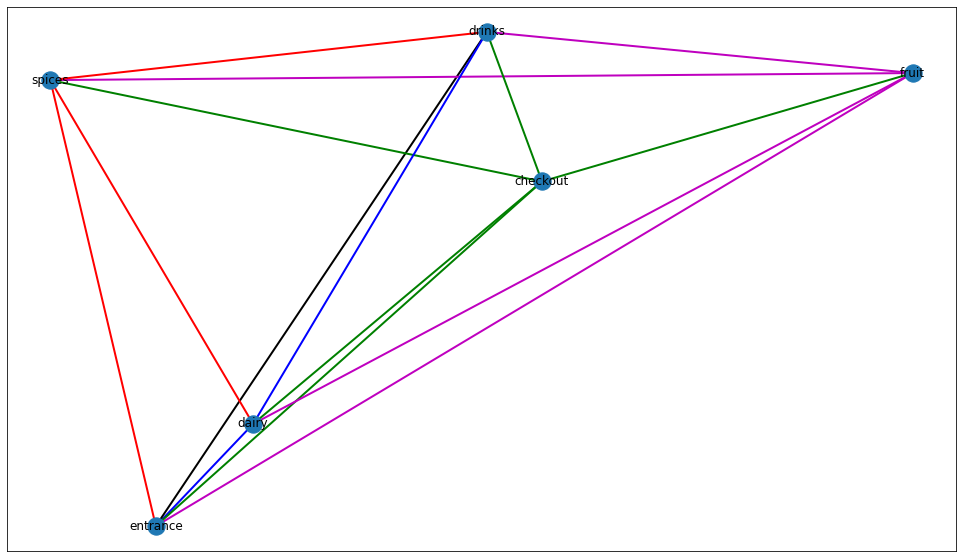

In [294]:
plt.rcParams['figure.figsize'] = (17,10)

g = nx.Graph()

g.add_edge('entrance', 'fruit', color='m' , weight=0)
g.add_edge('entrance', 'spices', color='r' , weight=0)
g.add_edge('entrance', 'dairy', color='b' , weight=1)
g.add_edge('entrance', 'drinks', color='k' , weight=0)
g.add_edge('entrance', 'checkout', color='g' , weight=0)

g.add_edge('fruit', 'fruit', color='m' , weight=0.808821)
g.add_edge('fruit', 'spices', color='r' , weight=0.024126)
g.add_edge('fruit', 'dairy', color='b' , weight=0.045601)
g.add_edge('fruit', 'drinks', color='k' , weight=0.026031)
g.add_edge('fruit', 'checkout', color='g' , weight=0.095421)

g.add_edge('spices', 'fruit', color='m' , weight=0.042865)
g.add_edge('spices', 'spices', color='r' , weight=0.718189)
g.add_edge('spices', 'dairy', color='b' , weight=0.091209)
g.add_edge('spices', 'drinks', color='k' , weight=0.077096)
g.add_edge('spices', 'checkout', color='g' , weight=0.070640)

g.add_edge('dairy', 'fruit', color='m' , weight=0.025742)
g.add_edge('dairy', 'spices', color='r' , weight=0.026582)
g.add_edge('dairy', 'dairy', color='b' , weight=0.864543)
g.add_edge('dairy', 'drinks', color='k' , weight=0.030288)
g.add_edge('dairy', 'checkout', color='g' , weight=0.052845)

g.add_edge('drinks', 'fruit', color='m' , weight=0.087909)
g.add_edge('drinks', 'spices', color='r' , weight=0.086983)
g.add_edge('drinks', 'dairy', color='b' , weight=0.010899)
g.add_edge('drinks', 'drinks', color='k' , weight=0.598705)
g.add_edge('drinks', 'checkout', color='g' , weight=0.215505)


edges = g.edges()
colors = [g[u][v]['color'] for u,v in edges]
weights = [g[u][v]['weight'] for u,v in edges]

labels = nx.get_edge_attributes(G,'weight')

nx.draw_networkx(g,  edges=edges,  edge_color=colors, with_label = True , weight = weights , width=2.0)

#nx.draw_networkx(g,  edges=edges,  edge_color=colors, with_label = True , width=weights )

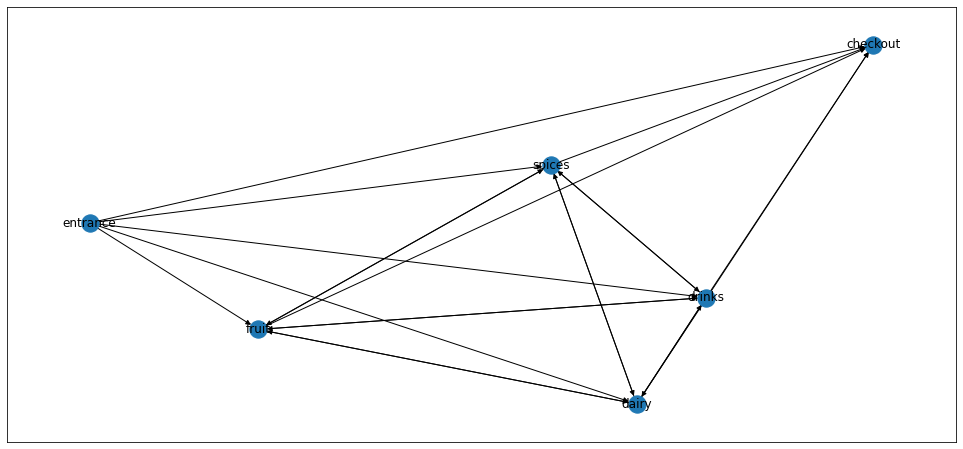

In [278]:
plt.rcParams['figure.figsize'] = (17,8)

g = nx.MultiDiGraph()

g.add_edge('entrance', 'fruit',  label='0')
g.add_edge('entrance', 'spices', label='0')
g.add_edge('entrance', 'dairy',label='1')
g.add_edge('entrance', 'drinks', label='0')
g.add_edge('entrance', 'checkout', label='0')

g.add_edge('fruit', 'fruit', label='0.808821')
g.add_edge('fruit', 'spices',  label='0.024126')
g.add_edge('fruit', 'dairy', label='0.045601')
g.add_edge('fruit', 'drinks', label='0.026031')
g.add_edge('fruit', 'checkout', label='0.095421')

g.add_edge('spices', 'fruit',  label='0.042865')
g.add_edge('spices', 'spices', label='0.718189')
g.add_edge('spices', 'dairy',  label='0.091209')
g.add_edge('spices', 'drinks',  label='0.077096')
g.add_edge('spices', 'checkout',  label='0.070640')

g.add_edge('dairy', 'fruit', label='0.025742')
g.add_edge('dairy', 'spices',  label='0.026582')
g.add_edge('dairy', 'dairy',  label='0.864543')
g.add_edge('dairy', 'drinks',  label='0.030288')
g.add_edge('dairy', 'checkout',  label='0.052845')

g.add_edge('drinks', 'fruit',  label='0.087909')
g.add_edge('drinks', 'spices', label='0.086983')
g.add_edge('drinks', 'dairy',  label='0.010899')
g.add_edge('drinks', 'drinks',  label='0.598705')
g.add_edge('drinks', 'checkout',  label='0.215505')


nx.draw_networkx(g,  with_label = True )

# nx-write_dot(g, 'graph.dot')
# need graphviz , problem with inst. when ready, each probability will be visible on the labls between two locations 